___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
weather = pd.read_csv('weather.csv')

In [5]:
weather.shape

(4017, 27)

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [6]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [7]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [9]:
weather.DATE.nunique()

4017

In [11]:
weather[['TMIN','TAVG', 'TMAX']].describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,4017.0,43.484441,17.020298,-5.0,30.0,44.0,58.0,77.0
TAVG,1217.0,52.493016,17.830714,6.0,39.0,54.0,68.0,86.0
TMAX,4017.0,61.268608,18.199517,15.0,47.0,62.0,77.0,102.0


In [13]:
temperature = weather[['TMIN','TAVG', 'TMAX']]

In [14]:
temperature['TAVG'].value_counts(dropna=False)

NaN     2800
53.0      33
69.0      32
73.0      31
72.0      30
        ... 
16.0       2
86.0       1
15.0       1
6.0        1
8.0        1
Name: TAVG, Length: 81, dtype: int64

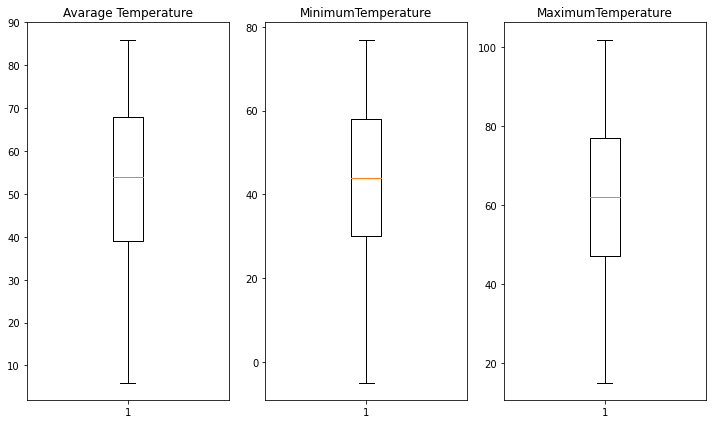

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(10,6))
ax[0].boxplot(data=temperature, x=temperature['TAVG'].dropna())
ax[0].set_title('Avarage Temperature')
ax[1].boxplot(data=temperature, x=temperature['TMIN'].dropna())
ax[1].set_title('MinimumTemperature')
ax[2].boxplot(data=temperature, x=temperature['TMAX'].dropna())
ax[2].set_title('MaximumTemperature')

fig.tight_layout()
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [16]:
weather['TDIFF'] = weather['TMAX'] -  weather['TMIN']
weather['TDIFF']

0       18
1       16
2        9
3        6
4       15
        ..
4012    17
4013    14
4014    12
4015     8
4016    15
Name: TDIFF, Length: 4017, dtype: int64

In [17]:
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

<Figure size 576x504 with 0 Axes>

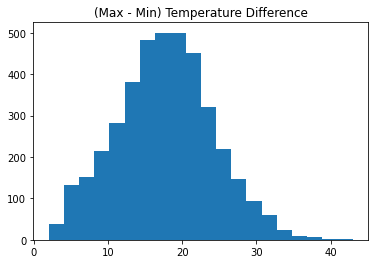

In [18]:
plt.figure(figsize=(8,7))
fig, ax = plt.subplots()
ax.set_title('(Max - Min) Temperature Difference')
ax.hist(weather['TDIFF'], bins=20)

plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [18]:
# weather has different value for same date. Before WT we need some calculations on weather. Then we will define WT, 
# Groupby on  date and take maximum bad_conditions because we don't know which date is true

In [20]:
WT = weather.loc[:,'WT01':'WT22']
WT

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
weather['bad_conditions'] = WT.sum(axis=1,skipna=True).astype('int32')
weather['bad_conditions']

0       2
1       2
2       3
3       4
4       4
       ..
4012    1
4013    0
4014    3
4015    2
4016    1
Name: bad_conditions, Length: 4017, dtype: int32

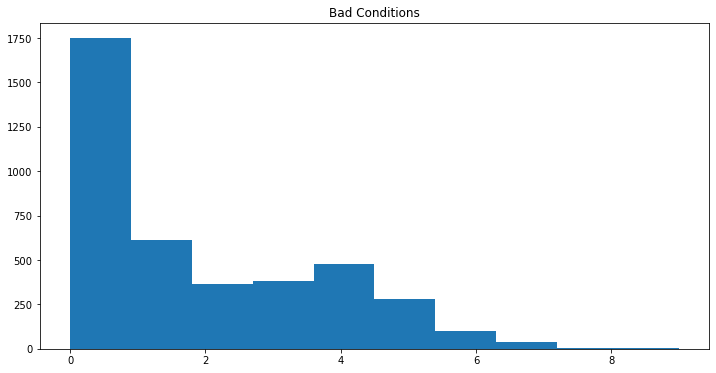

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Bad Conditions')
ax.hist(weather['bad_conditions'])
plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [23]:
weather['bad_conditions'].value_counts()

0    1749
1     613
4     476
3     380
2     367
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [24]:
mapping={0:'good',1:'bad',2:'bad',3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
mapping

{0: 'good',
 1: 'bad',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 5: 'worse',
 6: 'worse',
 7: 'worse',
 8: 'worse',
 9: 'worse'}

In [25]:
weather['rating'] = weather['bad_conditions'].map(mapping)
weather['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [30]:
from pandas.api.types import CategoricalDtype

In [31]:
cats = ['good', 'bad', 'worse']
cats

['good', 'bad', 'worse']

In [32]:
cats = CategoricalDtype(categories= cats, ordered=True)

In [33]:
weather['rating'] = weather.rating.astype(cats)

In [34]:
weather['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [35]:
ri = pd.read_csv('RI_cleaned.csv', low_memory=False)

ri = ri.drop(['county_name','county_fips','fine_grained_location','state'], axis=1)
ri.dropna(how='all', subset=['driver_gender'],inplace=True)
ri.reset_index(drop = True, inplace = True)
ri['is_arrested'] = ri['is_arrested'].astype('bool')
combined = ri['stop_date'] + ' ' + ri['stop_time']
ri['stop_datetime'] = pd.to_datetime(combined)

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

In [36]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
3,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
4,RI-2005-00006,2005-01-12,08:05,Zone X1,000,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [37]:
ri.shape

(480584, 23)

In [38]:
weather_rating = weather[['DATE', 'rating']].copy()

In [39]:
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [40]:
weather_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    4017 non-null   object  
 1   rating  4017 non-null   category
dtypes: category(1), object(1)
memory usage: 35.6+ KB


In [41]:
weather_rating.shape

(4017, 2)

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [42]:
ri_weather = pd.merge(ri, weather_rating, how='left', left_on='stop_date', right_on='DATE')
ri_weather

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,DATE,rating
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,bad
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,2005-01-02,bad
2,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,2005-01-04,bad
3,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00,2005-01-06,worse
4,RI-2005-00006,2005-01-12,08:05,Zone X1,000,M,1973.0,32.0,B,Black,...,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00,2005-01-12,worse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480579,RI-2015-47061,2015-12-31,22:46,Zone X1,000,M,1959.0,56.0,H,Hispanic,...,False,Citation,False,0-15 Min,True,False,Zone X1,2015-12-31 22:46:00,2015-12-31,bad
480580,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone X4,2015-12-31 22:47:00,2015-12-31,bad
480581,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,Hispanic,...,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08:00,2015-12-31,bad
480582,RI-2015-47064,2015-12-31,23:44,Zone K2,900,M,1984.0,31.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44:00,2015-12-31,bad


In [43]:
ri_weather.shape

(480584, 25)

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [44]:
ri_weather.is_arrested.mean()

0.03454755048024903

In [45]:
ri_weather.groupby('rating')['is_arrested'].mean()

rating
good     0.033004
bad      0.035199
worse    0.039360
Name: is_arrested, dtype: float64

In [46]:
ri_weather.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district', 'stop_datetime', 'DATE', 'rating'],
      dtype='object')

In [47]:
ri_weather['violation'].value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [48]:
ri_weather.groupby(['rating','violation'])['is_arrested'].mean()

rating  violation          
good    Equipment              0.056484
        Moving violation       0.055621
        Other                  0.082492
        Registration/plates    0.076831
        Seat belt              0.025503
        Speeding               0.013214
bad     Equipment              0.059704
        Moving violation       0.057976
        Other                  0.084991
        Registration/plates    0.092749
        Seat belt              0.028845
        Speeding               0.013368
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [49]:
arrest_rate=ri_weather.groupby(['rating','violation'])['is_arrested'].mean()

In [50]:
arrest_rate

rating  violation          
good    Equipment              0.056484
        Moving violation       0.055621
        Other                  0.082492
        Registration/plates    0.076831
        Seat belt              0.025503
        Speeding               0.013214
bad     Equipment              0.059704
        Moving violation       0.057976
        Other                  0.084991
        Registration/plates    0.092749
        Seat belt              0.028845
        Speeding               0.013368
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

In [51]:
arrest_rate['bad']['Moving violation']

0.05797625940938043

In [52]:
arrest_rate[:,'Speeding']

rating
good     0.013214
bad      0.013368
worse    0.016600
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [53]:
dfar= pd.DataFrame(arrest_rate)
dfar

is_arrested
rating violation                       
good   Equipment               0.056484
       Moving violation        0.055621
       Other                   0.082492
       Registration/plates     0.076831
       Seat belt               0.025503
       Speeding                0.013214
bad    Equipment               0.059704
       Moving violation        0.057976
       Other                   0.084991
       Registration/plates     0.092749
       Seat belt               0.028845
       Speeding                0.013368
worse  Equipment               0.094373
       Moving violation        0.062249
       Other                   0.058704
       Registration/plates     0.098673
       Seat belt               0.000000
       Speeding                0.016600

In [54]:
dfar= pd.DataFrame(dfar.to_records())
dfar

,rating,violation,is_arrested
0,good,Equipment,0.056484
1,good,Moving violation,0.055621
2,good,Other,0.082492
3,good,Registration/plates,0.076831
4,good,Seat belt,0.025503
5,good,Speeding,0.013214
6,bad,Equipment,0.059704
7,bad,Moving violation,0.057976
8,bad,Other,0.084991
9,bad,Registration/plates,0.092749


In [55]:
ri_weather.pivot_table(values='is_arrested', index='rating',columns='violation')

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.056484,0.055621,0.082492,0.076831,0.025503,0.013214
bad,0.059704,0.057976,0.084991,0.092749,0.028845,0.013368
worse,0.094373,0.062249,0.058704,0.098673,0.000000,0.016600


In [56]:
ri_weather.pivot_table(values='is_arrested',columns=['violation','rating'])

violation   Equipment                     Moving violation            \
rating           good       bad     worse             good       bad   
is_arrested  0.056484  0.059704  0.094373         0.055621  0.057976   

violation                 Other                     Registration/plates  \
rating          worse      good       bad     worse                good   
is_arrested  0.062249  0.082492  0.084991  0.058704            0.076831   

violation                       Seat belt                  Speeding            \
rating            bad     worse      good       bad worse      good       bad   
is_arrested  0.092749  0.098673  0.025503  0.028845   0.0  0.013214  0.013368   

violation            
rating        worse  
is_arrested  0.0166